In [2]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from sklearn.decomposition import PCA
import pandas as pd

from salishsea_tools import viz_tools

In [3]:
#Import dataset

phys = xr.open_dataset('/ocean/cstang/SalishSeaCast daily salinity_test_20210101_20220101.nc')

data = np.array(phys.vosaline)
t1 = np.array(data[0][0])
t2 = data[1][0]
avgt = np.zeros_like(t1)
print(avgt)

phys

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<xarray.Dataset>
Dimensions:   (time: 366, depth: 1, gridY: 898, gridX: 398)
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01T12:00:00 ... 2022-01-01T12:00:00
  * depth     (depth) float32 76.59
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
Data variables:
    vosaline  (time, depth, gridY, gridX) float32 nan nan nan ... nan nan nan
Attributes:
    name:         SalishSeaCast daily salinity_test_20210101_20220101
    description:  Daily extracted from SalishSeaCast v201905 hindcast
    history:      2022-11-12 14:34 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

<xarray.Dataset>
Dimensions:   (time: 366, depth: 1, gridY: 898, gridX: 398)
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01T12:00:00 ... 2022-01-01T12:00:00
  * depth     (depth) float32 76.59
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
Data variables:
    vosaline  (time, depth, gridY, gridX) float32 nan nan nan ... nan nan nan
Attributes:
    name:         SalishSeaCast daily salinity_test_20210101_20220101
    description:  Daily extracted from SalishSeaCast v201905 hindcast
    history:      2022-11-12 14:34 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

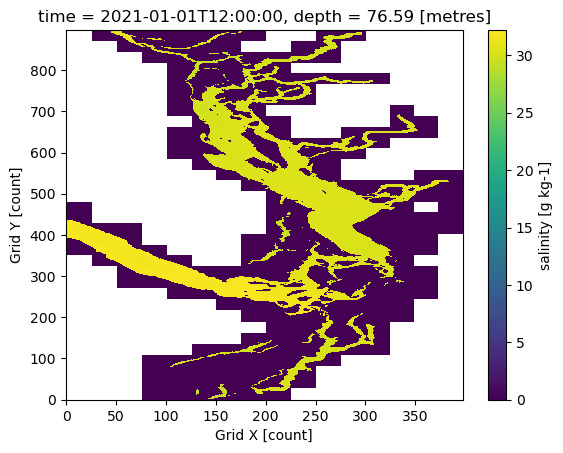

In [4]:
phys.vosaline[0, 0].plot();
phys

In [5]:
#Importing data and getting rid of the 4th dimension (which is just 1 depth)

data = Dataset('/ocean/cstang/SalishSeaCast daily salinity_test_20210101_20220101.nc')
Salinity = data.variables['vosaline']
Sal_dep = Salinity[:,0,:,:]
print(Sal_dep.shape)

# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

info = np.ma.masked_array(phys.vosaline[0, 0], mask=tmask[0])
info2 = np.ma.masked_array(phys.vosaline[90, 0], mask=tmask[0])
info3 = np.ma.masked_array(phys.vosaline[180, 0], mask=tmask[0])
info4 = np.ma.masked_array(phys.vosaline[260, 0], mask=tmask[0])

for i in range(len(info[:,0])):
    for j in range(len(info[0,:])):
        if info[i,j] == 0:
            info[i,j] = np.nan
        if info2[i,j] == 0:
            info2[i,j] = np.nan
        if info3[i,j] == 0:
            info3[i,j] = np.nan
        if info4[i,j] == 0:
            info4[i,j] = np.nan
        

(366, 898, 398)


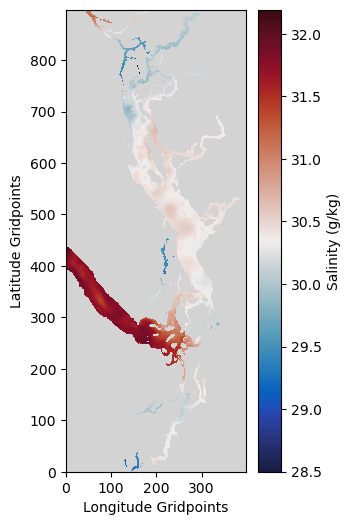

In [6]:
# Sample raw data plot

cmap = cm.balance
cmap.set_bad('lightgray')
fig, ax = plt.subplots(1, 1, figsize=(3, 6))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
colours = ax.pcolormesh(info, cmap=cmap)
#ax.set_title('January 1st 2021')
ax.set_ylabel('Latitude Gridpoints')
ax.set_xlabel('Longitude Gridpoints')
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')
viz_tools.set_aspect(ax);


Text(0.5, 1.0, 'September 18th 2021')

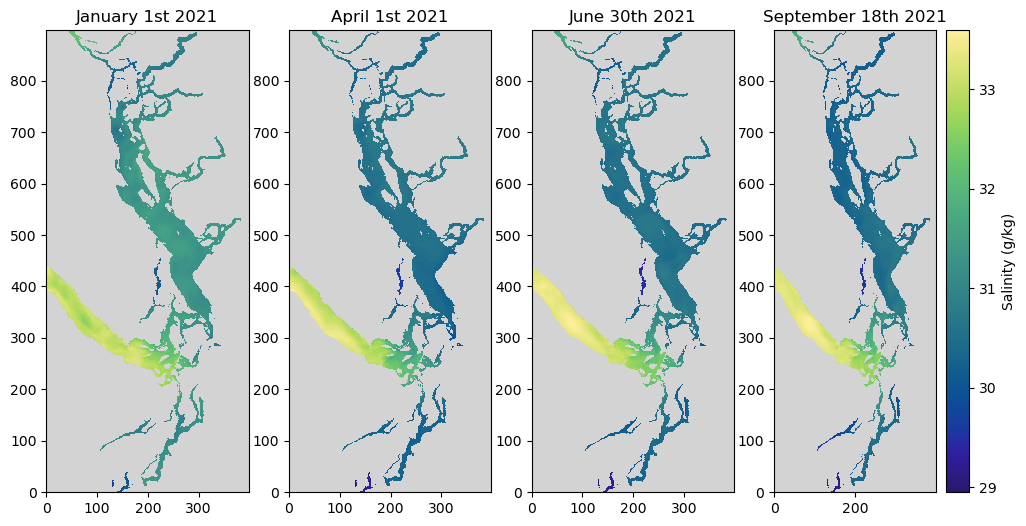

In [7]:
#Plot raw data for each season

cmap = cm.haline
cmap.set_bad('lightgray')
fig, ax = plt.subplots(1, 4, figsize=(12, 6))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
colours = ax[0].pcolormesh(info, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax[0])
# cb.set_label('Salinity (g/kg)')
colours = ax[1].pcolormesh(info2, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax[1])
# cb.set_label('Salinity (g/kg)')
ax[0].set_title('January 1st 2021')
colours = ax[2].pcolormesh(info3, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax[2])
# cb.set_label('Salinity (g/kg)')
colours = ax[3].pcolormesh(info4, cmap=cmap)
cb = fig.colorbar(colours, ax=ax[3])
cb.set_label('Salinity (g/kg)')
#viz_tools.set_aspect(ax);
ax[1].set_title('April 1st 2021')
ax[2].set_title('June 30th 2021')
ax[3].set_title('September 18th 2021')

In [8]:
#Making the 2D array but getting rid of the nan's
#y-data now only includes the datapoints that aren't nan (182442 vs. ~357000)

Sal_dep.shape
sal_70 = np.ones((365,182442))
# count = 0

for ii in range(Sal_dep.shape[0]-1):
    sal_70[ii,:] = Sal_dep[ii,:,:][~np.isnan(Sal_dep[ii,:,:])]
   

print(sal_70) 
    

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
#Messing around

ll = 100

print(np.where(sal_70[ll,:][sal_70[ll,:]!=0])[0].shape)
print(sal_70[ll,:].shape)

(52740,)
(182442,)


In [10]:

#Removing all the 0's from dataset

test = np.array(Sal_dep)
test[np.isnan(test)] = 0
#print(test)
sal_701 = np.ones((365,52740))
# count = 0

for ii in range(Sal_dep.shape[0]-1):
    sal_701[ii,:] = test[ii,:][test[ii,:]!=0]
   
sal_70 = sal_701
print(sal_701.shape) 

print(np.where(test!=0))

(365, 52740)
(array([  0,   0,   0, ..., 365, 365, 365]), array([  1,   1,   1, ..., 896, 896, 896]), array([140, 141, 142, ...,  54,  55, 174]))


In [11]:
#Running PCA on 77m in 2021 data 

pca_input_S = sal_70
print(sal_70[sal_70!=0].shape)
n_modes_S = 10
pca_S = PCA(n_components = n_modes_S)
PCs_S = pca_S.fit_transform(pca_input_S)
eigvecs_S = pca_S.components_
fracVar_S = pca_S.explained_variance_ratio_
print(eigvecs_S.shape)

(19250100,)
(10, 52740)


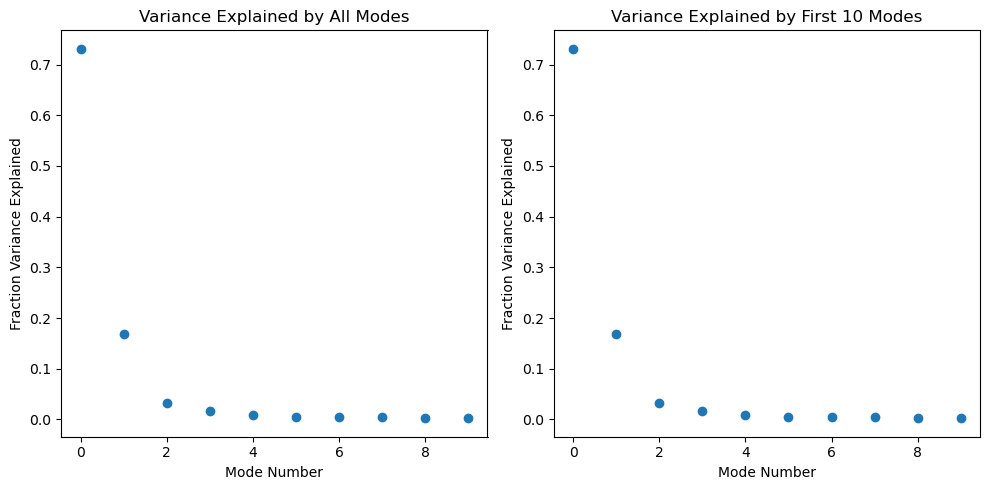

In [12]:
#plot fraction of variance explained by each mode
n_modes_show = 5

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar_S)),fracVar_S)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_S),fracVar_S[:n_modes_S])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

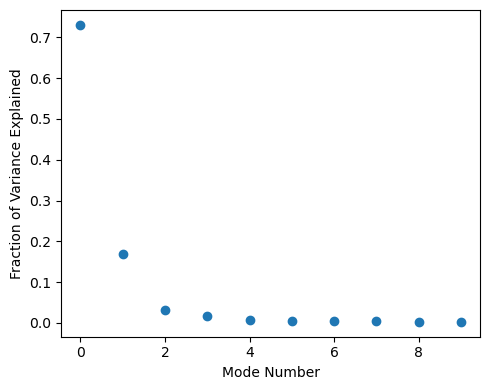

In [13]:
#plot for report

n_modes_show = 5

plt.figure(figsize=(5,4))

n_modes_show = 10
plt.scatter(range(n_modes_S),fracVar_S[:n_modes_S])
plt.xlabel('Mode Number')
plt.ylabel('Fraction of Variance Explained')
#plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')
plt.tight_layout()
plt.show()

In [14]:
#Print fraction of variance

arr = np.zeros((898,398))*np.nan
print(arr)
print(fracVar_S)
print(sum(fracVar_S[0:2]))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[0.73099126 0.16831733 0.0314148  0.01613842 0.00804031 0.0053164
 0.00461013 0.00388383 0.00280233 0.00225884]
0.8993085902835514


(10, 52740)
(52740,)
(52740,)


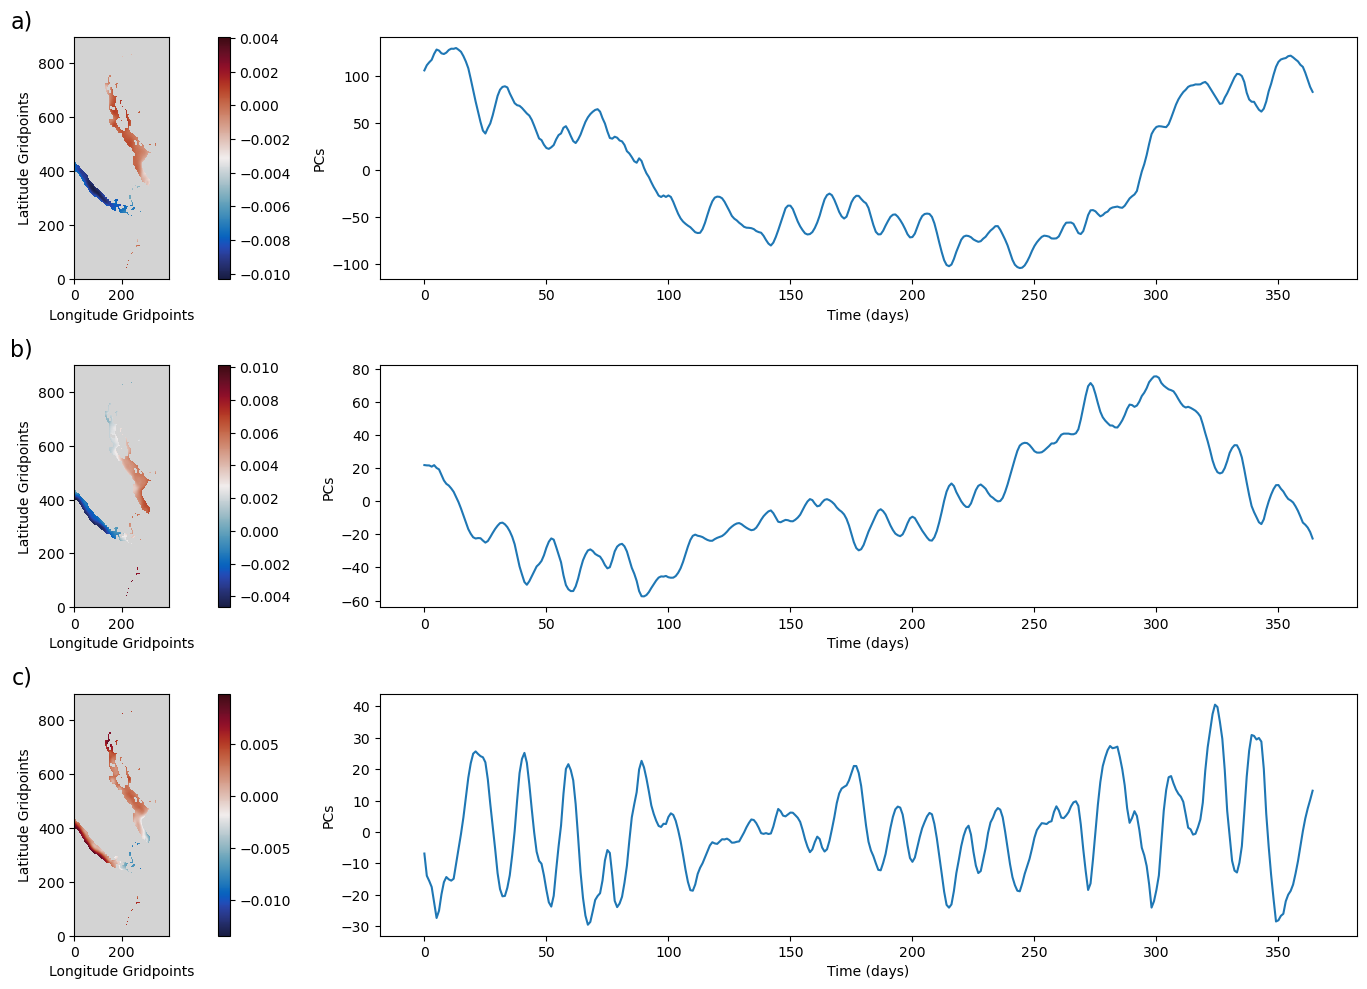

In [15]:
#Set 0's back to nan for plotting
eigvecs_S[eigvecs_S==0] = np.nan

n = 3
T_extent=[0,398,0,898]

#plot the first 3 modes
fig,ax = plt.subplots(3,2,figsize=(20,10))
print(eigvecs_S.shape)
hh = np.where(~np.isnan(Sal_dep[0,:,:]))
hh = np.where(test[0,:,:] !=0) #Will be the same for each day
rr = hh[0]
cc = hh[1]
print(rr.shape)
print(cc.shape)
label = ['a)','b)','c)']

for kk in range(n):
    cmap = cm.balance
    cmap.set_bad('lightgray')
    plt.subplot(n,2,kk*2+1)
    arr = np.zeros((898,398))*np.nan
    for ii in range(52470):
        arr[rr[ii],cc[ii]] = eigvecs_S[kk,ii]
    cb = ax[kk,0].imshow(np.flipud(arr),extent=T_extent,cmap = cmap,aspect='auto')
    plt.colorbar(cb)
    cb.set_label('Salinity Anomaly')
    viz_tools.set_aspect(ax[kk,0]);
    ax[kk,0].text(-175, 1000, label[kk],fontsize=16, fontweight='normal', va='top', ha='right')
    ax[kk,0].set_xlabel('Longitude Gridpoints')
    ax[kk,0].set_ylabel('Latitude Gridpoints')
    
    plt.subplot(n,2,(kk+1)*2)
    ax[kk,1].plot(PCs_S[:,kk])
    #plt.title('PCs of Mode #' + str(kk+1))
    ax[kk,1].set_xlabel('Time (days)')
    ax[kk,1].set_ylabel('PCs')
    
    plt.tight_layout();

In [16]:
%run som_class.ipynb

In [17]:
#run SOM 

#make and train the self-organizing map

N = len(sal_70) #number of observations to use as input to SOM
obs = np.array(sal_70)[-N:]
print(obs.shape)
print(sal_70.shape)


# here is for 2x2 SOM (Nx=2, Ny=2):
Nx = 2
Ny = 2
N_nodes = Nx*Ny # number of nodes in SOM
N_obs = np.shape(obs)[0] #number of observations 
N_dims = np.shape(obs)[1] #number of dimensions per observation
learning_rate = 1e-2
N_epochs = 100
colours_list = 'pink_blue_red_purple'
colours_list = 'pinks'
colours_list = 'default2'

#initialize
som = SOM(Nx, Ny, obs, N_epochs, linewidth = 4, colours_list = colours_list)
som.initialize_map(node_shape = 'rect')

#train
som.train_map(learning_rate)
z = som.z #this is the pattern of each BMU
z_epochs = som.z_epochs #this is the pattern of each BMU through training (each epoch)
bmus = BMUs(som) #bmu of each observation
freq = BMU_frequency(som) #frequency of each bmu
_,bmus_colours = colourmap_2D(colours_list = colours_list, Nx = Nx, Ny = Ny) #colours of each bmu, for plotting
QE = som.QE() #quantization error of map
TE = som.TE() #topographic error of map


(365, 52740)
(365, 52740)


In [18]:
QE, TE
z.shape


(4, 52740)

0 AxesSubplot(0.125,0.11;0.168478x0.77)
1 AxesSubplot(0.327174,0.11;0.168478x0.77)
2 AxesSubplot(0.529348,0.11;0.168478x0.77)
3 AxesSubplot(0.731522,0.11;0.168478x0.77)


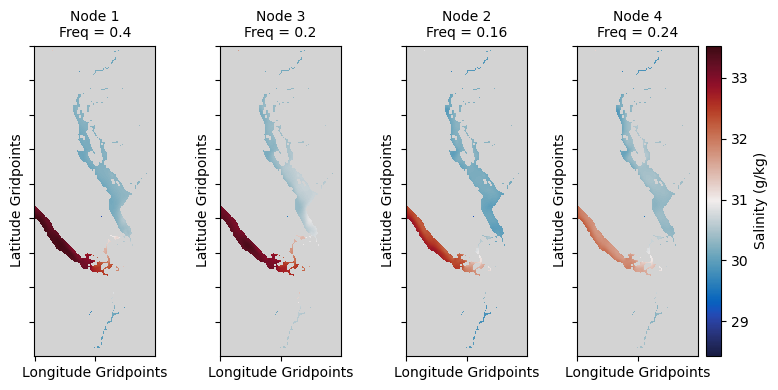

In [20]:
#visualize BMU patterns as images
z[z==0] = np.nan
hh = np.where(~np.isnan(Sal_dep[0,:,:]))

indices = np.arange(N_nodes).reshape(Nx,Ny).T.flatten()
_,bmus_colours = colourmap_2D(colours_list = som.colours_list, Nx = Nx, Ny = Ny)

fig, axes = plt.subplots(nrows = 1, ncols = Nx*Ny, figsize = (4*Ny, 4))

vmin = np.min(z)
vmax = np.max(z)
label = ['A)','B)','C)','D)']

for kk, ax in enumerate(axes.flatten()): #for each axis (subplot)
    cmap = cm.balance
    cmap.set_bad('lightgray')
    print(kk,ax)
    arr = np.zeros((898,398))*np.nan
    for ii in range(52470):
        arr[rr[ii],cc[ii]] = z[kk,ii]
    var = np.flipud(arr)
    cb = ax.imshow(var, cmap = cmap, aspect = 'auto', vmin = vmin, vmax = vmax)
    ax.set_title('Node ' + str(indices[kk]+1) + '\nFreq = ' + str(np.round(BMU_frequency(som)[indices[kk]], decimals = 2)), fontsize = 10)
    ax.set_xlabel('Longitude Gridpoints', fontsize = 10)
    ax.set_ylabel('Latitude Gridpoints', fontsize = 10)
    ax.tick_params(labelbottom=False, labelleft=False)
    viz_tools.set_aspect(axes[kk]);
plt.colorbar(cb,shrink = 1,label='Salinity (g/kg)')
plt.tight_layout()